## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
!git clone https://github.com/krishnaik06/Deep-Learning-Car-Brand/


Cloning into 'Deep-Learning-Car-Brand'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 63 (delta 27), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [3]:
import zipfile
with zipfile.ZipFile('/content/Deep-Learning-Car-Brand/Datasets.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('Datasets/Train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 25s 15s/step - loss: 5.7349 - accuracy: 0.3542 - val_loss: 8.6452 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 19s 14s/step - loss: 5.5180 - accuracy: 0.3438 - val_loss: 4.6675 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 7.2064 - accuracy: 0.3750 - val_loss: 5.6141 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 20s 14s/step - loss: 7.8498 - accuracy: 0.3958 - val_loss: 2.8378 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 20s 14s/step - loss: 3.4922 - accuracy: 0.3542 - val_loss: 2.5084 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 20s 14s/step - loss: 2.9873 - accuracy: 0.4896 - val_loss: 5.3797 - val_accuracy: 0.1552
Epoch 7/50
2/2 [==============================] - 20s 14s/step - loss: 4.1382 - accuracy: 0.3854 - val_loss: 1.8057 - val_accuracy: 0.5345
Epoch 8/50
2/2 [===========

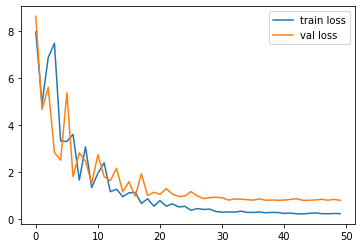

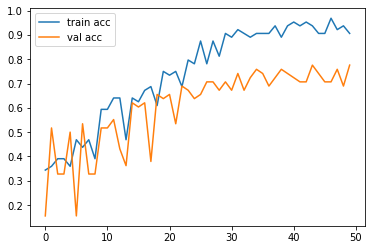

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('car_brand_model_resnet50.h5')

In [21]:

y_pred = model.predict(test_set)


In [22]:
y_pred

array([[4.8022736e-02, 8.0550098e-01, 1.4647630e-01],
       [2.6378774e-03, 7.9467875e-01, 2.0268346e-01],
       [2.1967674e-02, 9.1315860e-01, 6.4873807e-02],
       [2.5994418e-02, 6.1221027e-01, 3.6179534e-01],
       [2.5594058e-02, 2.4679247e-03, 9.7193807e-01],
       [1.6503464e-01, 4.7028810e-01, 3.6467725e-01],
       [4.2452056e-02, 7.9970294e-01, 1.5784501e-01],
       [7.1560258e-01, 2.5922166e-02, 2.5847530e-01],
       [4.0560596e-02, 6.5541095e-01, 3.0402848e-01],
       [5.8201963e-06, 1.0829463e-03, 9.9891126e-01],
       [5.5930333e-05, 5.5990455e-04, 9.9938416e-01],
       [1.9008766e-01, 2.8342938e-01, 5.2648300e-01],
       [3.8929608e-02, 5.3981292e-01, 4.2125747e-01],
       [1.2336118e-02, 9.7340977e-01, 1.4254038e-02],
       [9.3503648e-01, 4.8944898e-02, 1.6018670e-02],
       [2.8245342e-01, 5.0052875e-01, 2.1701784e-01],
       [3.2935057e-02, 1.7331271e-04, 9.6689165e-01],
       [6.4451044e-04, 9.7481573e-01, 2.4539744e-02],
       [9.7126037e-01, 1.948

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1,
       2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1])

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('car_brand_model_resnet50.h5')

In [30]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [31]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [32]:
x.shape

(224, 224, 3)

In [33]:
x=x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[2.9975301e-04, 6.4419080e-03, 9.9325836e-01]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

In [39]:
a==2

array([ True])